# Tutorial Assignment


# Data Prepping

In [38]:
# @title Data Loading

# All imports in one location
from google.colab import drive
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_squared_log_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Connecting Drive where the data was imported
drive.mount('/content/drive')
project_path = "/content/drive/MyDrive/Automobile.csv"

# Labeling the dataframe
df = pd.read_csv(project_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
# @title Understanding the Data

# Showing head, tail, shape, columns, dTypes, info, and describe for the data
print("\nDF Head")
print(df.head())

print("\nDF Tail")
print(df.tail())

print("\nDF Shape")
print(df.shape)

print("\nDF Columns")
print(df.columns)

print("\nDF dTypes")
print(df.dtypes)

print("\nDF Info")
print(df.info())

print("\nDF Describe")
print(df.describe())


DF Head
                        name   mpg  cylinders  displacement  horsepower  \
0  chevrolet chevelle malibu  18.0          8         307.0       130.0   
1          buick skylark 320  15.0          8         350.0       165.0   
2         plymouth satellite  18.0          8         318.0       150.0   
3              amc rebel sst  16.0          8         304.0       150.0   
4                ford torino  17.0          8         302.0       140.0   

   weight  acceleration  model_year origin  
0    3504          12.0          70    usa  
1    3693          11.5          70    usa  
2    3436          11.0          70    usa  
3    3433          12.0          70    usa  
4    3449          10.5          70    usa  

DF Tail
                name   mpg  cylinders  displacement  horsepower  weight  \
393  ford mustang gl  27.0          4         140.0        86.0    2790   
394        vw pickup  44.0          4          97.0        52.0    2130   
395    dodge rampage  32.0          

In [40]:
# @title Data Cleaning

# Removing nulls and dupes
print("Pre Cleaning Null/Dupe Check")
print(df.isnull().sum())
df = df.dropna()
df = df.drop_duplicates()

print("\nPost Cleaning Null/Dupe Drop")
print(df.isnull().sum())

Pre Cleaning Null/Dupe Check
name            0
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

Post Cleaning Null/Dupe Drop
name            0
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64


In [54]:
# @title Fix Columns - if needed

# Correct incorrect data types or print statement if no changes
# df['column_name'] = pd.to_datetime(df['column_name'])
print("No change to data types")

# Rename columns for clarity or print statement if no changes
df = df.rename(columns={'mpg': 'miles_per_gallon'})
print("Change(s) to column names")
# print("No changes to column names")

No change to data types
Change(s) to column names


In [44]:
# @title Creating Labeling for Visuals

Target = 'miles_per_gallon'
X_Axis = 'origin'
numerical_columns = ['miles_per_gallon', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']

# Visualizations

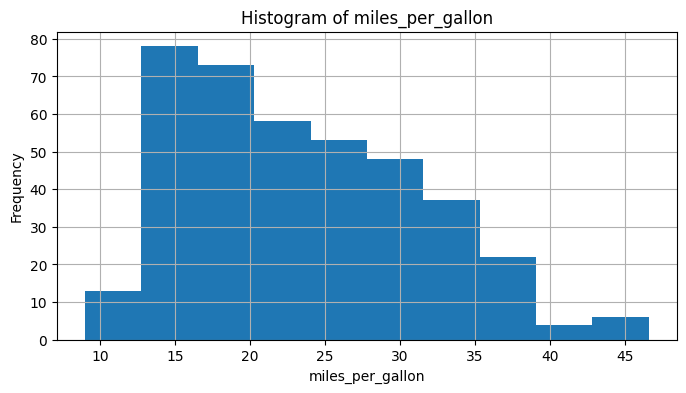

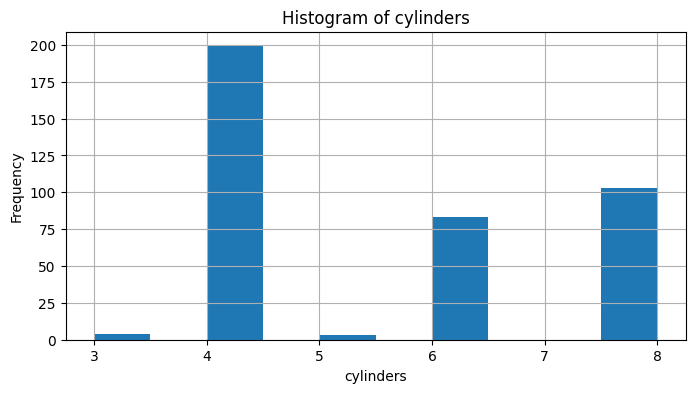

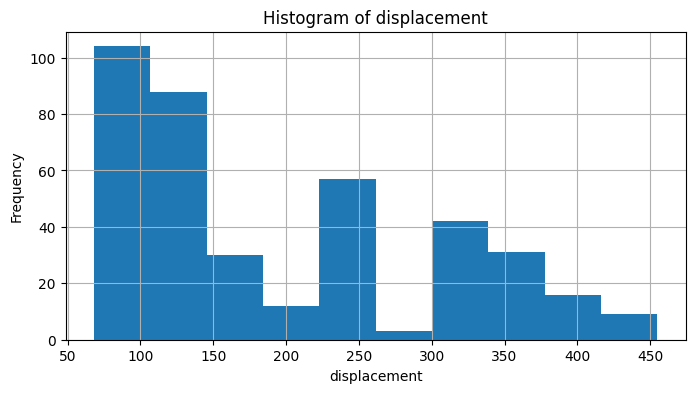

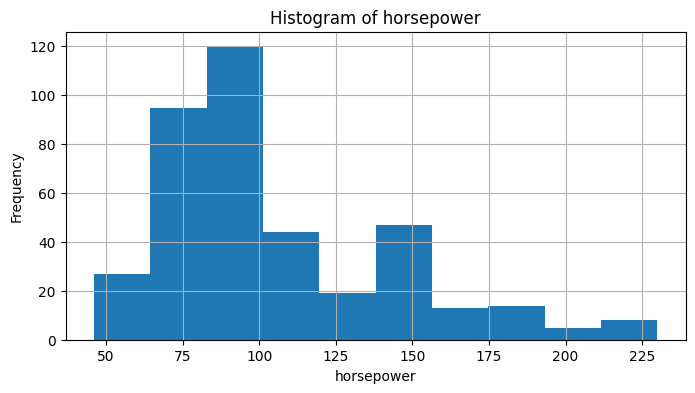

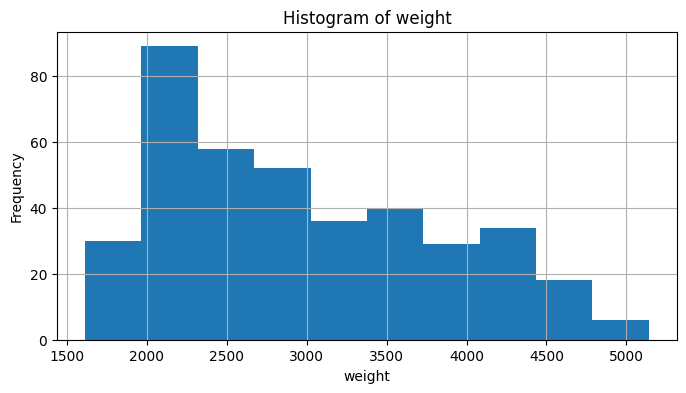

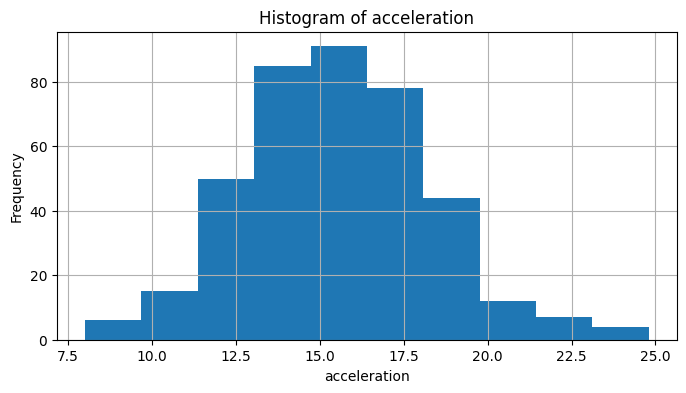

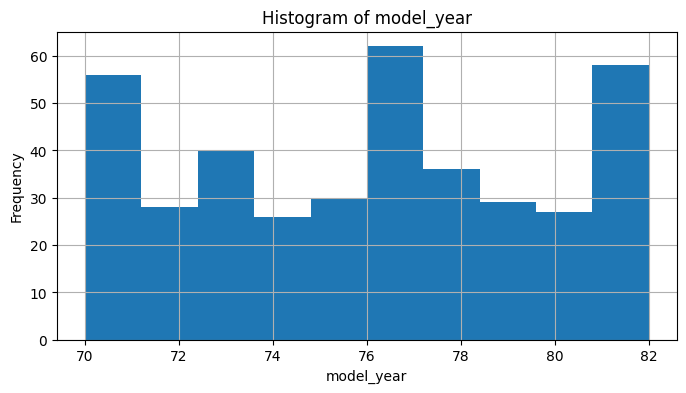

In [45]:
# @title Histogram

# Looping through each numerical for histograms
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    df[column].hist()
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

<Figure size 1000x600 with 0 Axes>

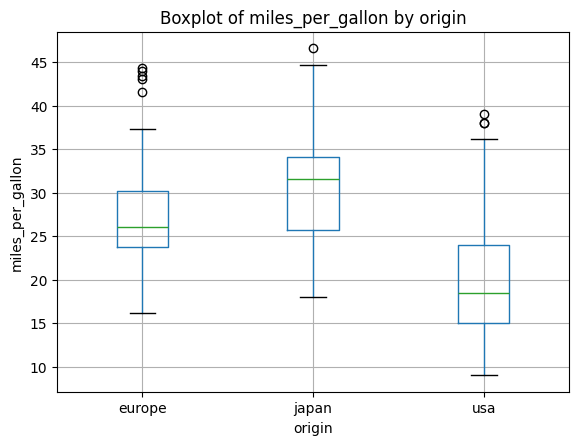

<Figure size 1000x600 with 0 Axes>

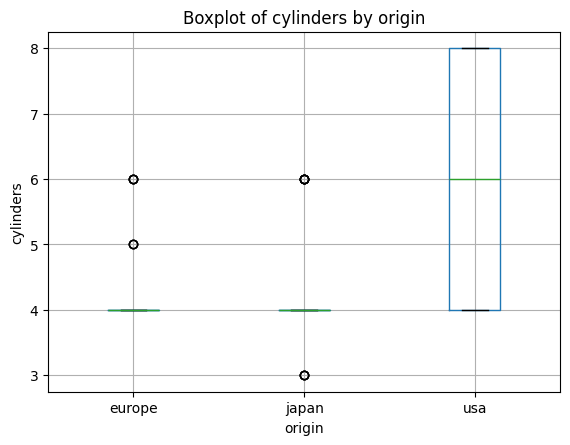

<Figure size 1000x600 with 0 Axes>

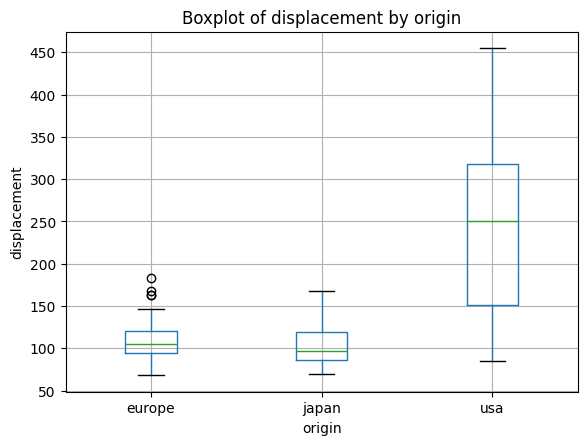

<Figure size 1000x600 with 0 Axes>

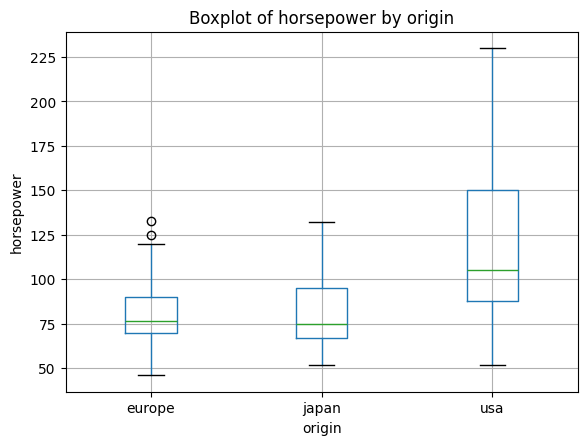

<Figure size 1000x600 with 0 Axes>

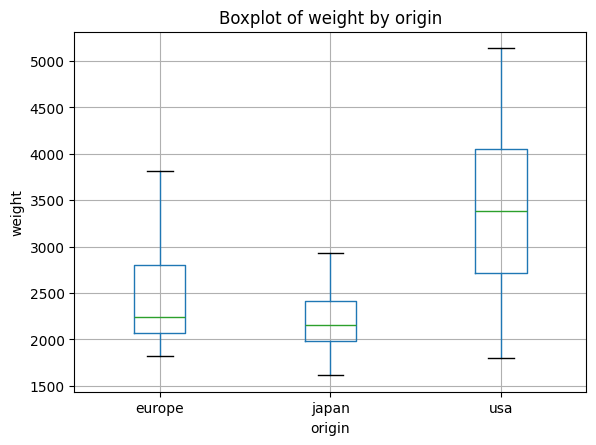

<Figure size 1000x600 with 0 Axes>

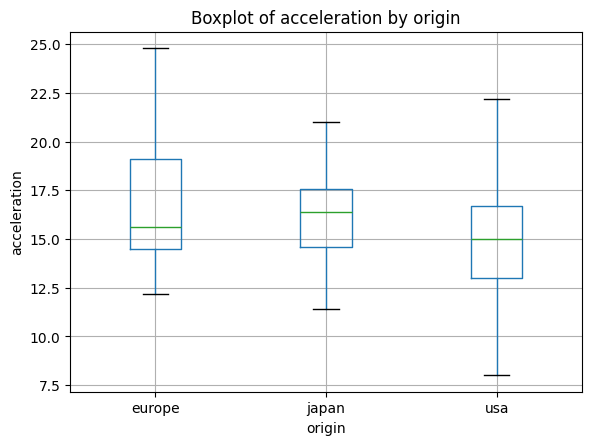

<Figure size 1000x600 with 0 Axes>

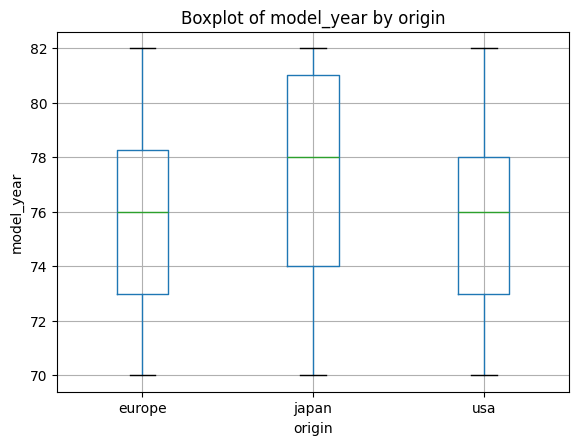

In [46]:
# @title Boxplot

# Looping through each numerical for boxplot
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    df.boxplot(column=column, by=X_Axis, grid=False)
    plt.title(f"Boxplot of {column} by {X_Axis}")
    plt.suptitle('')
    plt.xlabel(X_Axis)
    plt.ylabel(column)
    plt.grid(True)
    plt.show()

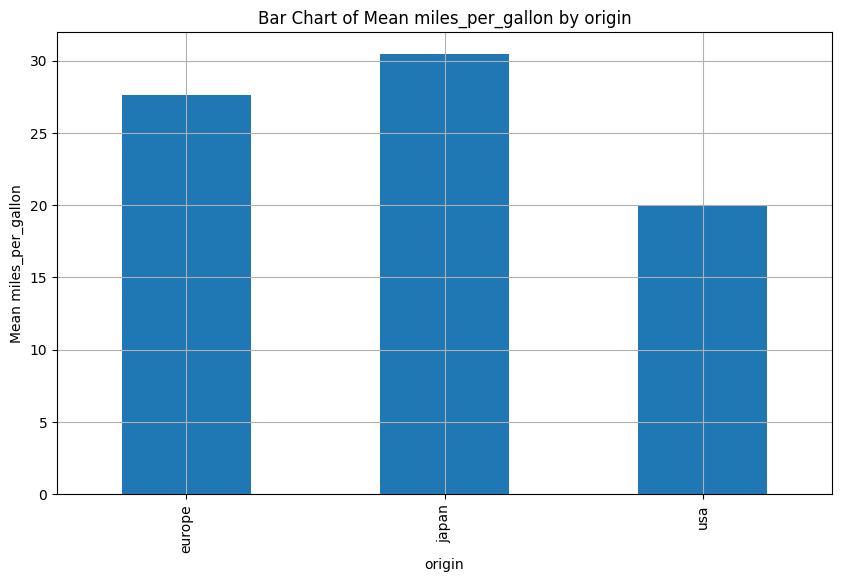

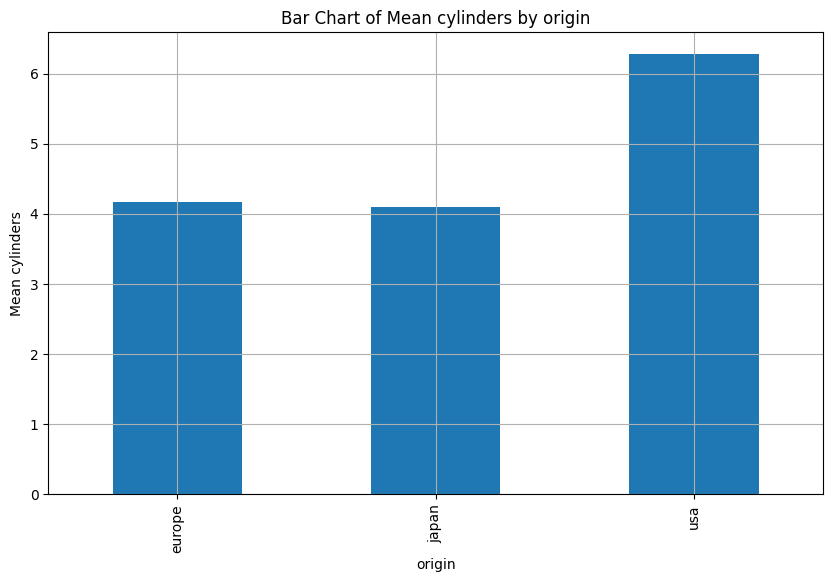

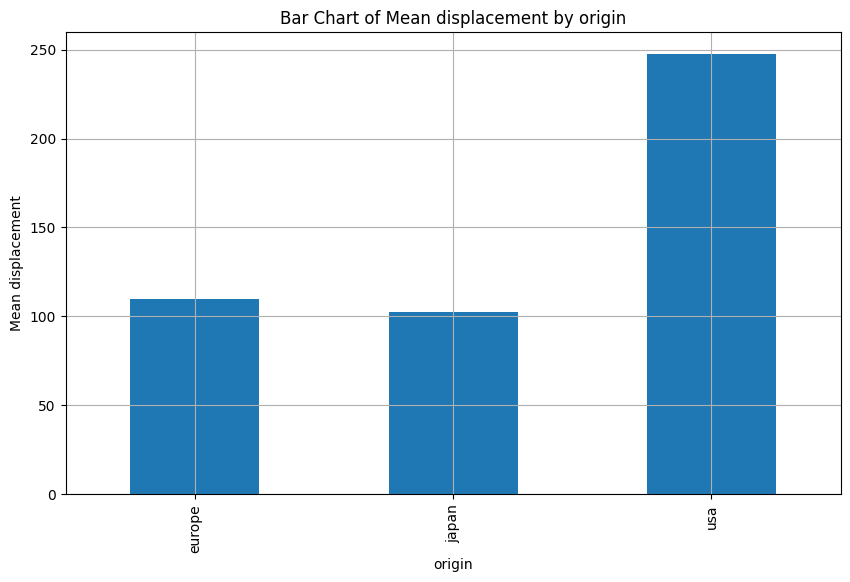

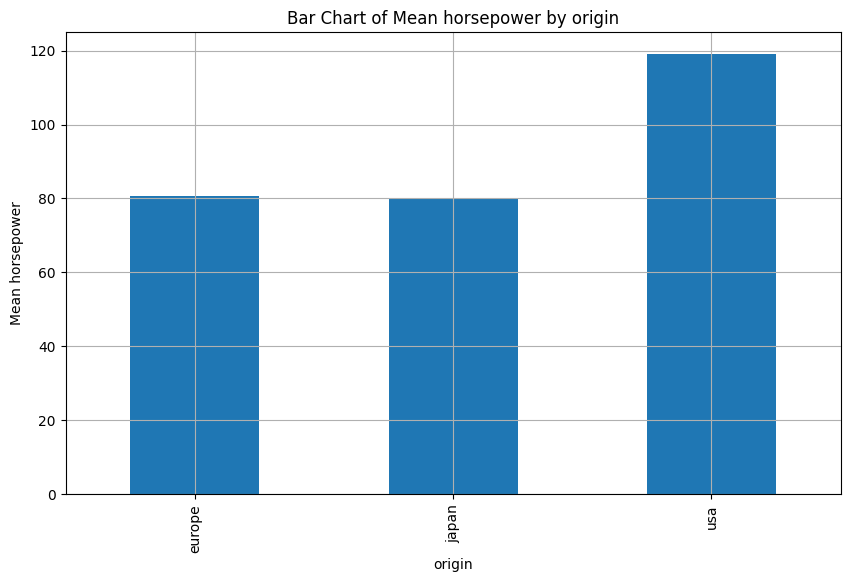

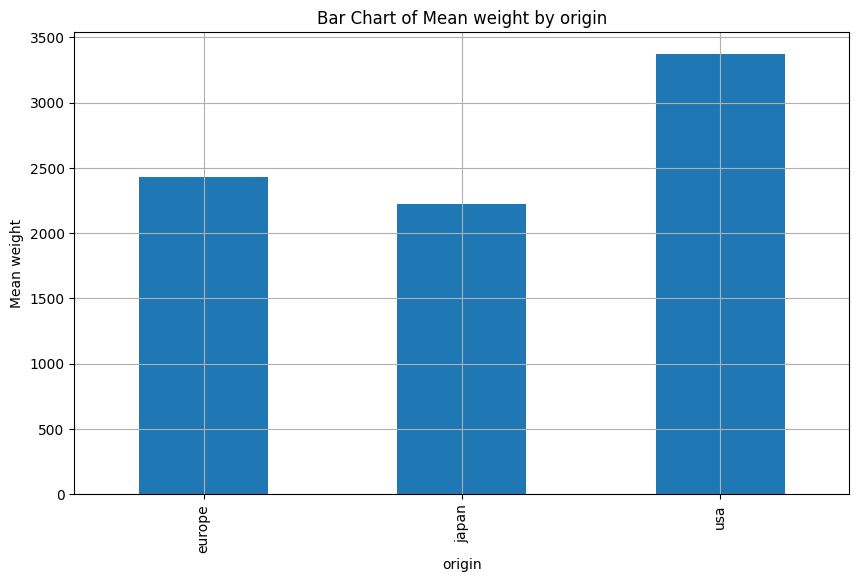

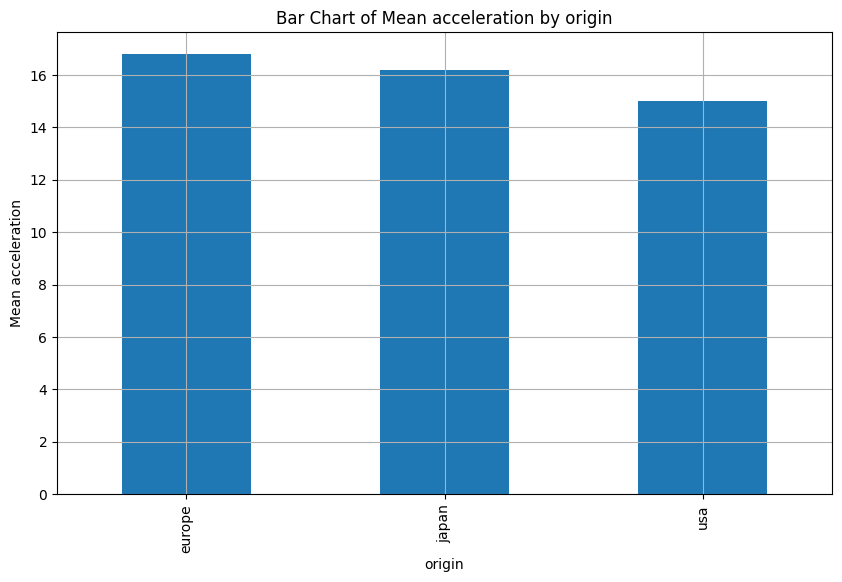

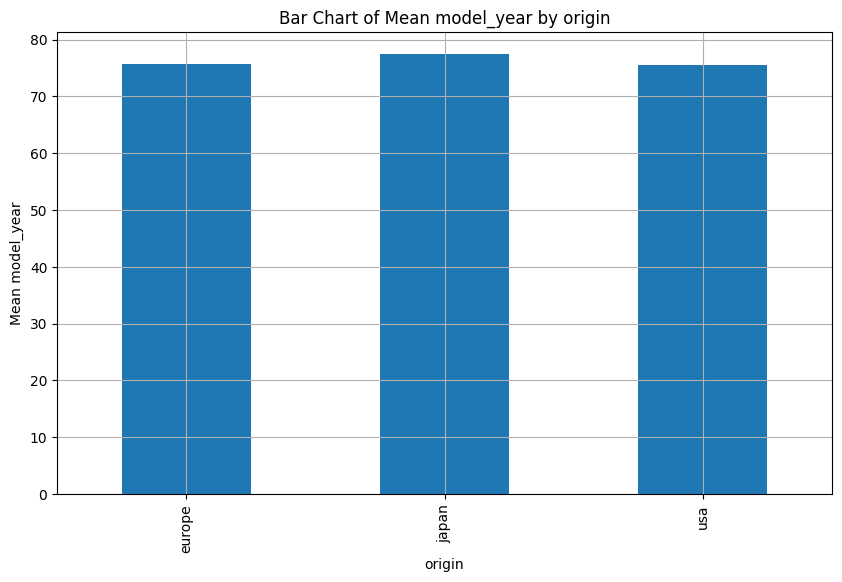

In [47]:
# @title Bar Chart

# Looping through numericals for bar chart
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    df.groupby(X_Axis)[column].mean().plot(kind='bar')
    plt.title(f"Bar Chart of Mean {column} by {X_Axis}")
    plt.xlabel(X_Axis)
    plt.ylabel(f"Mean {column}")
    plt.grid(True)
    plt.show()

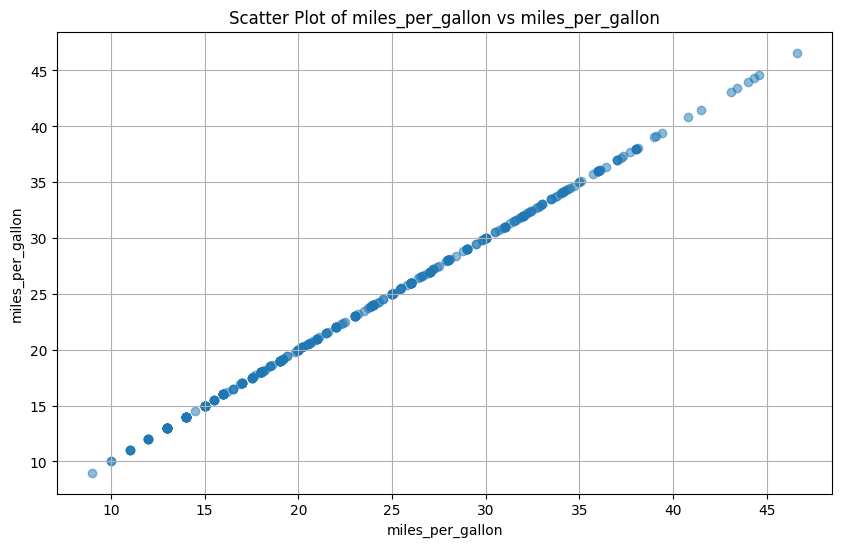

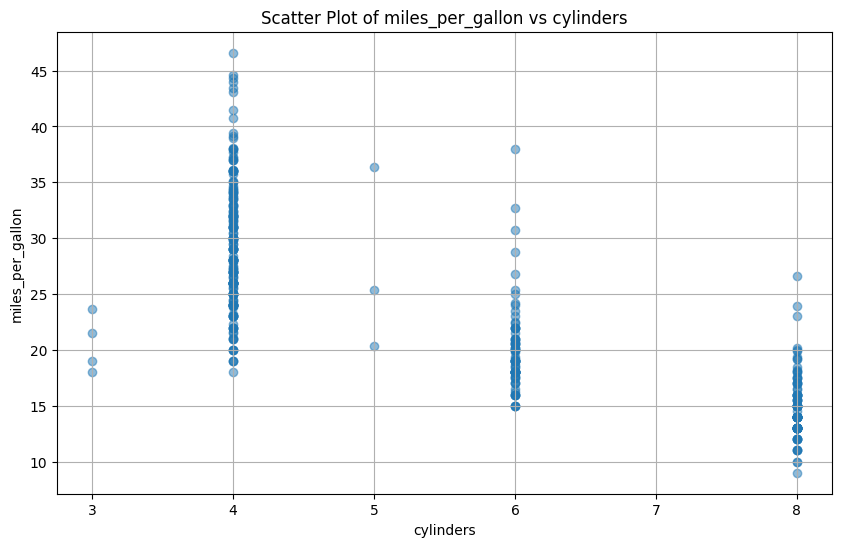

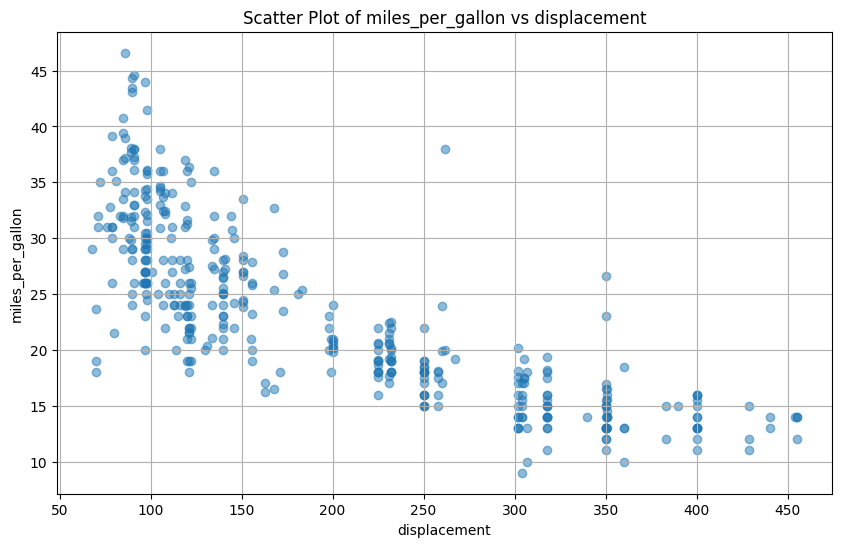

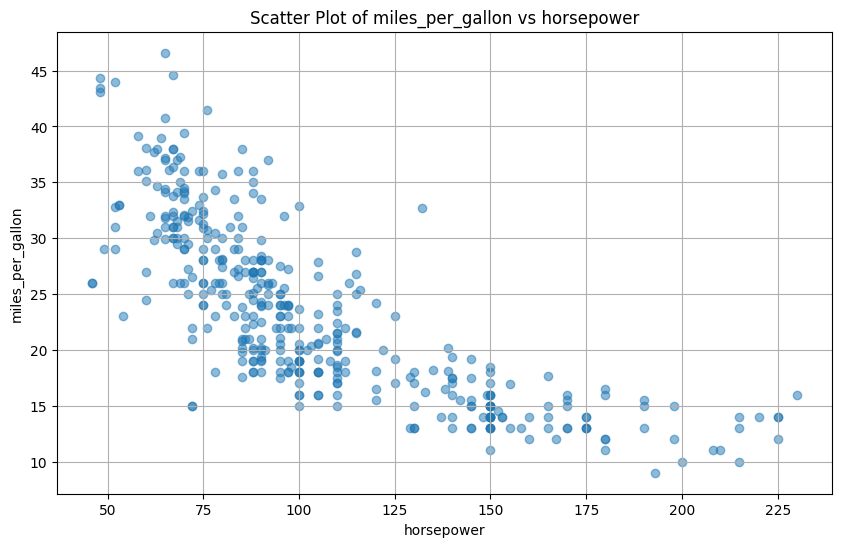

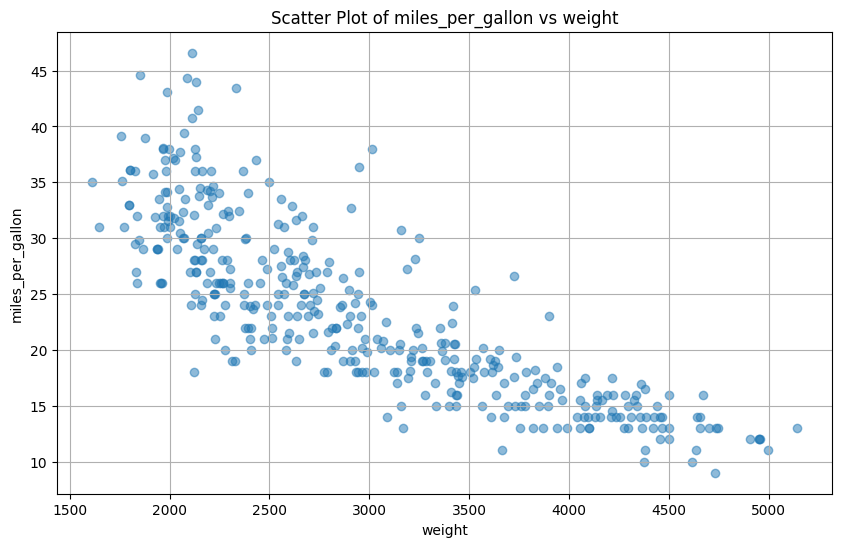

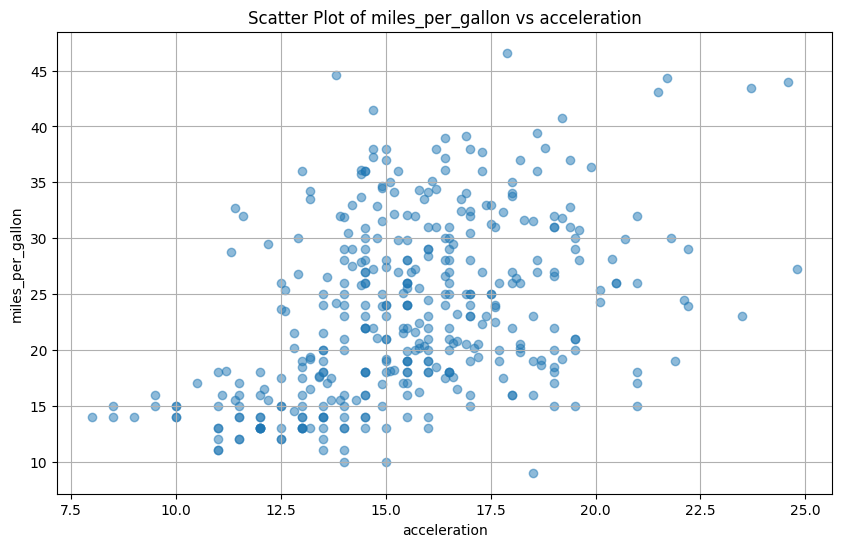

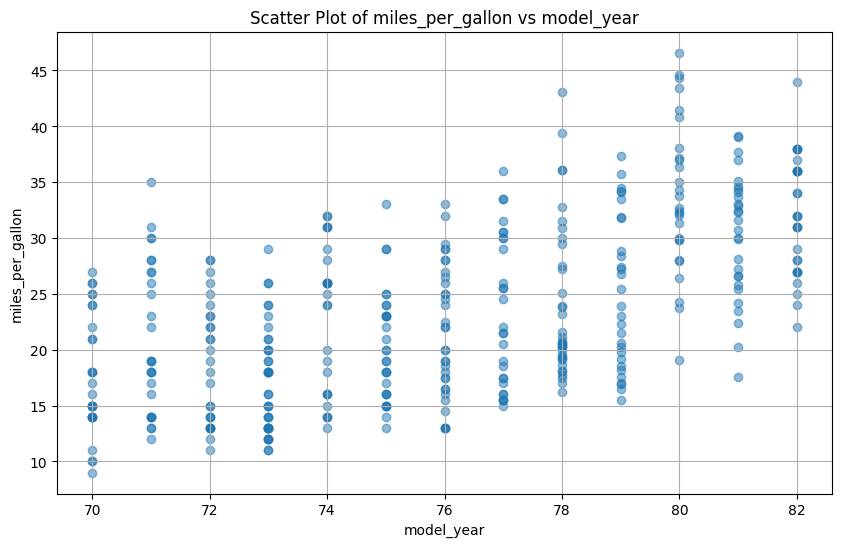

In [48]:
# @title Scatter Plot

# Looping through numericals for scatter plot
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[column], df[Target], alpha=0.5)
    plt.title(f"Scatter Plot of {Target} vs {column}")
    plt.xlabel(column)
    plt.ylabel(Target)
    plt.grid(True)
    plt.show()

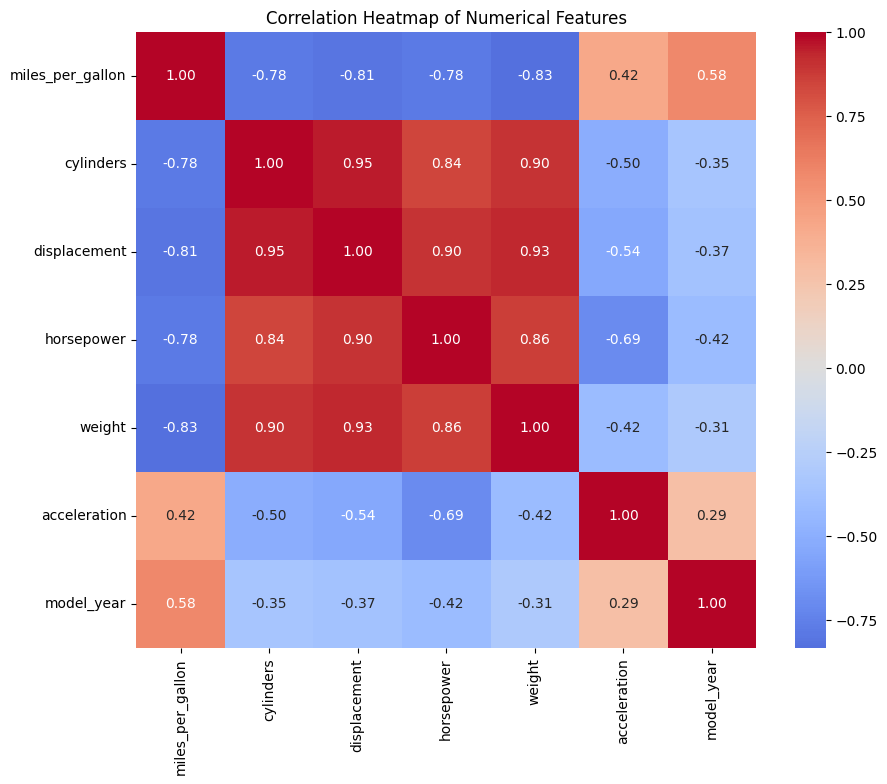

In [49]:
# @title Correlation Heatmap

numerical_df = df[numerical_columns]

# Calculate correlation matrix
correlation_matrix = numerical_df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# Linear Regression

In [50]:
# @title Encoding & Scaling

# Encoding categorical: category, object, bool
df = pd.get_dummies(df, columns=['origin'])

# Scaling numerical: int, float
# Numerical was already previously labeled, so just referencing it now
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [51]:
# @title Features (X) & Target (y)

# Dropping items
Other_Drop = 'name'
X = df.drop([Target, Other_Drop], axis=1)
y = df[Target]

In [52]:
# @title Split data and train model

# split data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# training the actual model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Mean Absolute Error 0.31584159644739207
Mean Squared Error 0.17448652387109737
R² Score 0.7922774714022581




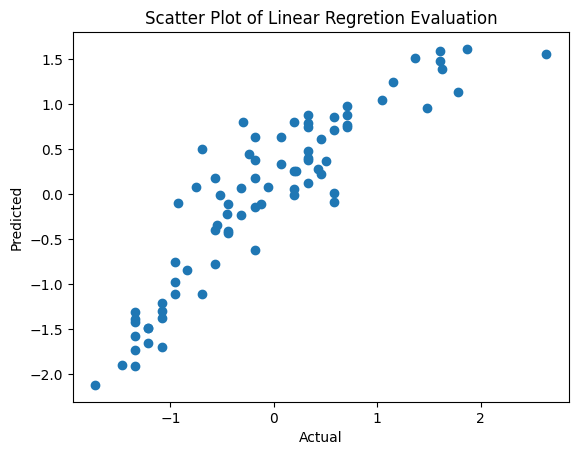

In [53]:
# @title Evaulating the model

# Values for the Errors and R squared
print("Mean Absolute Error", mean_absolute_error(y_test,y_pred))
print("Mean Squared Error", mean_squared_error(y_test, y_pred))
print("R² Score", r2_score(y_test, y_pred))
print("\n")

#Scatter plot
plt.scatter(y_test, y_pred)
plt.title("Scatter Plot of Linear Regretion Evaluation")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()